# Image classification Tensorflow using CNNs

In [1]:
import tensorflow as tf
import zipfile
from pathlib import Path
from PIL import Image
import numpy as np
from tensorflow.python.keras.saving.saved_model_experimental import sequential

%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as kB

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
trainSet = Path(r"E:\Datasets\CatsVsDogs\TrainingSet")
testSet = Path(r"E:\Datasets\CatsVsDogs\TestSet")

Printing a sample image of a cat

In [3]:
catsDir = trainSet / "cats"
dogsDir = trainSet / "dogs"

In [4]:
imgPathCat = random.choice(list(catsDir.glob("*.*")))
imgPathDog = random.choice(list(dogsDir.glob("*.*")))

In [5]:
imgCat = Image.open(imgPathCat)
imgDog = Image.open(imgPathDog)

In [6]:
imgCat = imgCat.convert("RGB")
imgDog = imgDog.convert("RGB")

In [7]:
imgNPCat = np.asarray(imgCat)
imgNPDog = np.asarray(imgDog)

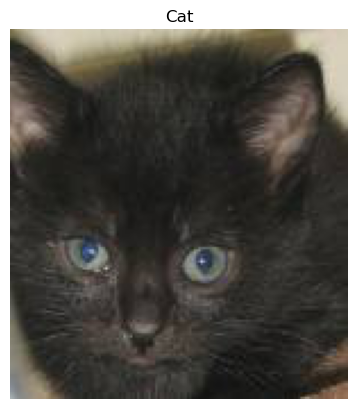

In [8]:
plt.imshow(imgNPCat)
plt.axis("off")
plt.title("Cat")
plt.show()

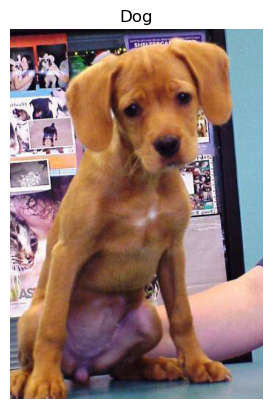

In [9]:
plt.imshow(imgNPDog)
plt.axis("off")
plt.title("Dog")
plt.show()

In [10]:
print(tf.__version__)

2.19.1


Parameter initialization

In [11]:
imgWidth, imgHeight = 150, 150
nbTrainSamples = 100
nbValidationSamples = 100
epochs = 20
batchSize = 20

Image data is represented in 3D array: row, cols, channels. Channels are the first dim in channel first representation

Size = 150 * 150 * 3 channels = 3

In [12]:
if kB.image_data_format()=='channels_first':
    inputShape = (3, imgWidth, imgHeight)
else:
    inputShape = (imgWidth, imgHeight, 3)

Image generation to train the model

In [13]:
trainDatagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

testDataGen = ImageDataGenerator(rescale=1./255) # RGB values

trainGen = trainDatagen.flow_from_directory(trainSet, target_size=(imgWidth, imgHeight), batch_size=batchSize, class_mode='binary', classes=['cats', 'dogs'])

validationGen = testDataGen.flow_from_directory(testSet, target_size=(imgWidth, imgHeight), batch_size=batchSize, class_mode='binary', classes=['cats', 'dogs'])

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


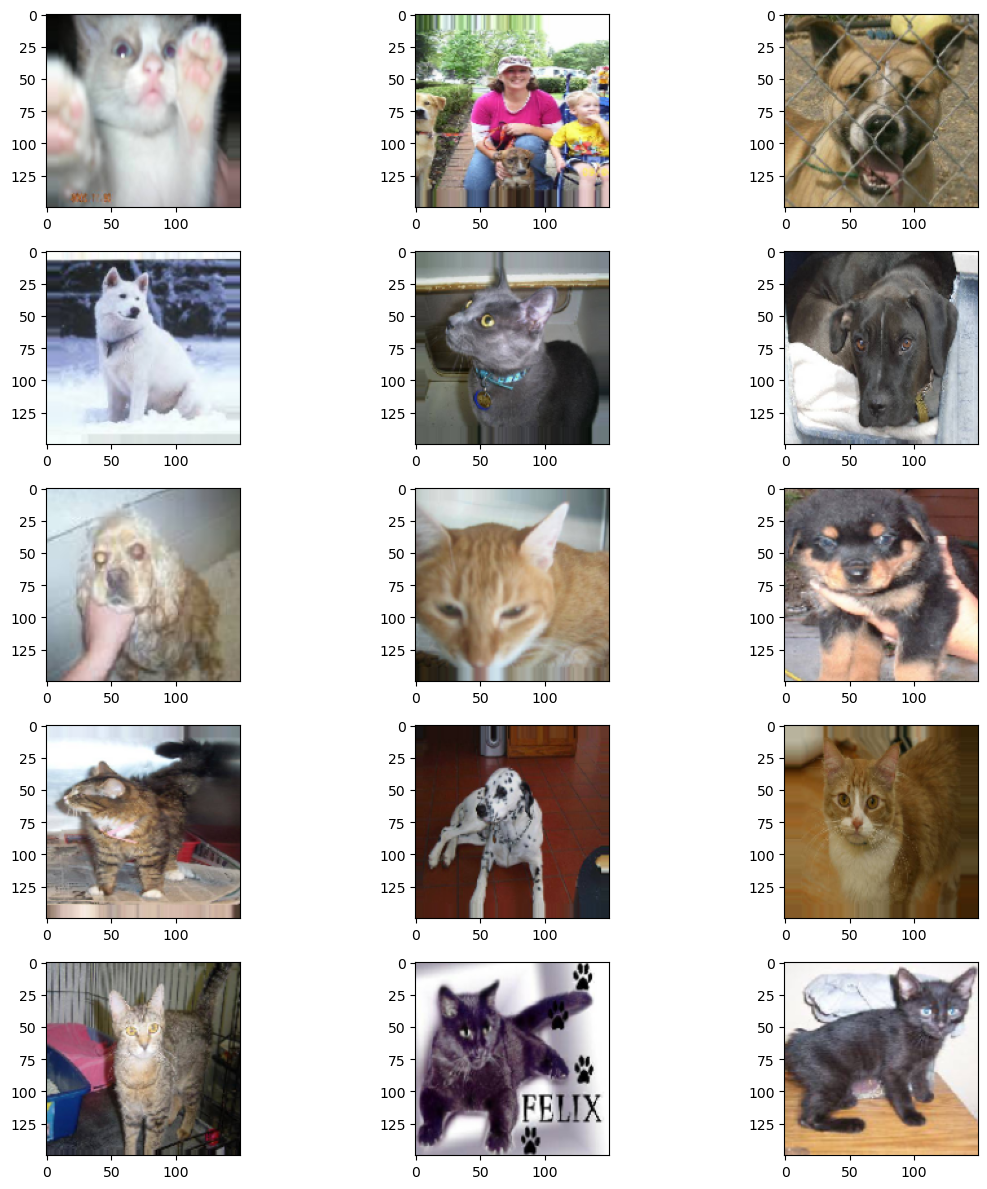

In [14]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for xBatch, yBatch in trainGen:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#### CNN model

#### Layers in CNN:

1. Convolutional layer
2. Relu
3. Pooling layer
4. Fully connected layer - Dense

In [15]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape= inputShape)) # 64 neurons in 3x3 filter

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Pooling reduces the size of the data

model.add(Flatten()) # Conversion of multi-dim array to 1D array
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1)) # Output layer
model.add(Activation('sigmoid'))
model.summary()

C:\Users\Almou\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 360000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    23,040,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,041,921 (87.90 MB)

 Trainable params: 23,041,921 (87.90 MB)

 Non-trainable params: 0 (0.00 B)

#### Model compilation

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 360000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    23,040,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,041,921 (87.90 MB)

 Trainable params: 23,041,921 (87.90 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Fitting

In [17]:
training = model.fit(trainGen, steps_per_epoch= nbTrainSamples, epochs=epochs, validation_data=validationGen, validation_steps=nbValidationSamples)

C:\Users\Almou\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 315ms/step - accuracy: 0.5008 - loss: 2.2151 - val_accuracy: 0.5005 - val_loss: 0.6931
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 0.4915 - loss: 0.6972 - val_accuracy: 0.5010 - val_loss: 1.0343
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 296ms/step - accuracy: 0.5200 - loss: 0.6991 - val_accuracy: 0.5005 - val_loss: 0.6932
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.5040 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.5000 - loss: 0.6932

C:\Users\Almou\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5005 - val_loss: 0.6932
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 293ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.5010 - val_loss: 0.6932
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 294ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.5005 - val_loss: 0.6932
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.5065 - loss: 0.6931 - val_accuracy: 0.4985 - val_loss: 0.6932
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.6000 - loss: 0.6916 - val_accuracy: 0.5010 - val_loss: 0.6932
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 294ms/step - accuracy: 0.4970 - loss: 0.6933 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.4925 - loss: 0.6945 - val_

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


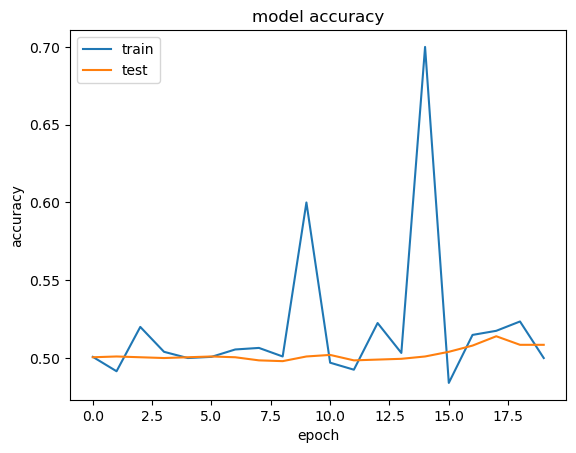

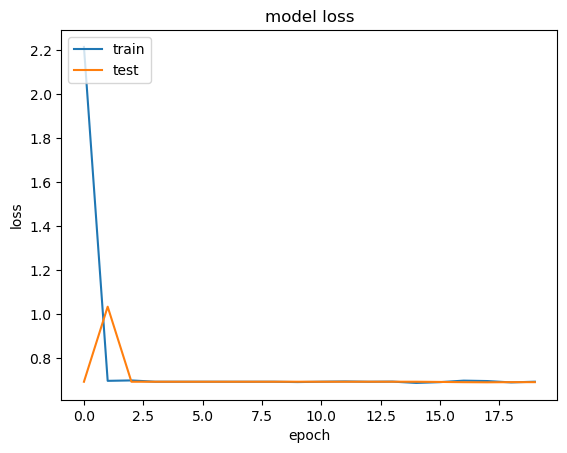

In [18]:
%matplotlib inline

print(training.history.keys()) # List of training data

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()